<a href="https://colab.research.google.com/github/jaewon-huh/DA_DS_dreamtree/blob/main/SanFranciscoCrime_classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL: https://www.kaggle.com/c/sf-crime (대회바로가기)

*  (https://github.com/BaekKyunShin/Kaggle/tree/master/SanFrancisco_Crime_Classification)  
*  (https://wikidocs.net/86627)

방향에 있어  참고한 포스트 들 


##**샌프란시스코의** 범죄 보고서를 통한 범죄유형별 범죄 발생 가능성 예측

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"realspbabo","key":"84850eca11ef7983c622626ae833305f"}'}

In [ ]:
ls -1ha kaggle.json


kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c sf-crime

 23% 5.00M/22.1M [00:00<00:00, 20.6MB/s]
100% 22.1M/22.1M [00:00<00:00, 63.6MB/s]
  0% 0.00/2.35M [00:00<?, ?B/s]
100% 2.35M/2.35M [00:00<00:00, 162MB/s]
 48% 9.00M/18.7M [00:00<00:00, 92.7MB/s]
100% 18.7M/18.7M [00:00<00:00, 119MB/s] 


In [ ]:
!ls

sample_data  sampleSubmission.csv.zip  test.csv.zip  train.csv.zip


In [ ]:
# zip 파일 압축 풀기
!unzip test.csv.zip
!unzip train.csv.zip
!unzip sampleSubmission.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    


In [ ]:
# csv 파일을 데이터프레임으로 읽기
import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sampleSubmission.csv')

## train 데이터 탐색

In [ ]:
train.shape

(878049, 9)

In [ ]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [72]:
train.isnull().sum()
# 열마다  결측데이터는 없다

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
year          0
month         0
day           0
dayofweek     0
hour          0
minute        0
X+Y           0
X-Y           0
n_days        0
dtype: int64

In [ ]:
# 중복 데이터 확인
print('중복 데이터 개수 : ' , train.duplicated().sum())


중복 데이터 개수 :  2323


In [ ]:
# 중복 데이터 제거 
train.drop_duplicates(inplace = True)
train.shape

(875726, 18)

**Columns 정보 **

* Dates - 범죄 사건 발생 날짜 및 시간 정보
* Category - 범죄 사건 카테고리(이 값이 예측할 목표변수)
* Descript - 범죄 사건에 대한 자세한 설명
* DayOfWeek - 요일
* PdDistrict - 경찰서 구역 이름
* Resolution - 범죄 사건이 해결 된 방법
* Address - 범죄 사건의 대략적인 주소
* X - 경도
* Y - 위도


X,Y 빼고는 다 문자열 정보 

*   Dates 는 시계열 정보로 바꿔야 할지도
*   Category, DayofWeek , PdDistrict 등은 범주화해야 할듯
*   Descript는 확인해 봐야 할듯



In [ ]:
train.describe(include= 'all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [ ]:
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

: Larceny / Theft 와 other offenses  범죄가 가장 많다

In [ ]:
len(train['Category'].value_counts().index)

39

: 범죄 유형은 총 39개이다 .

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

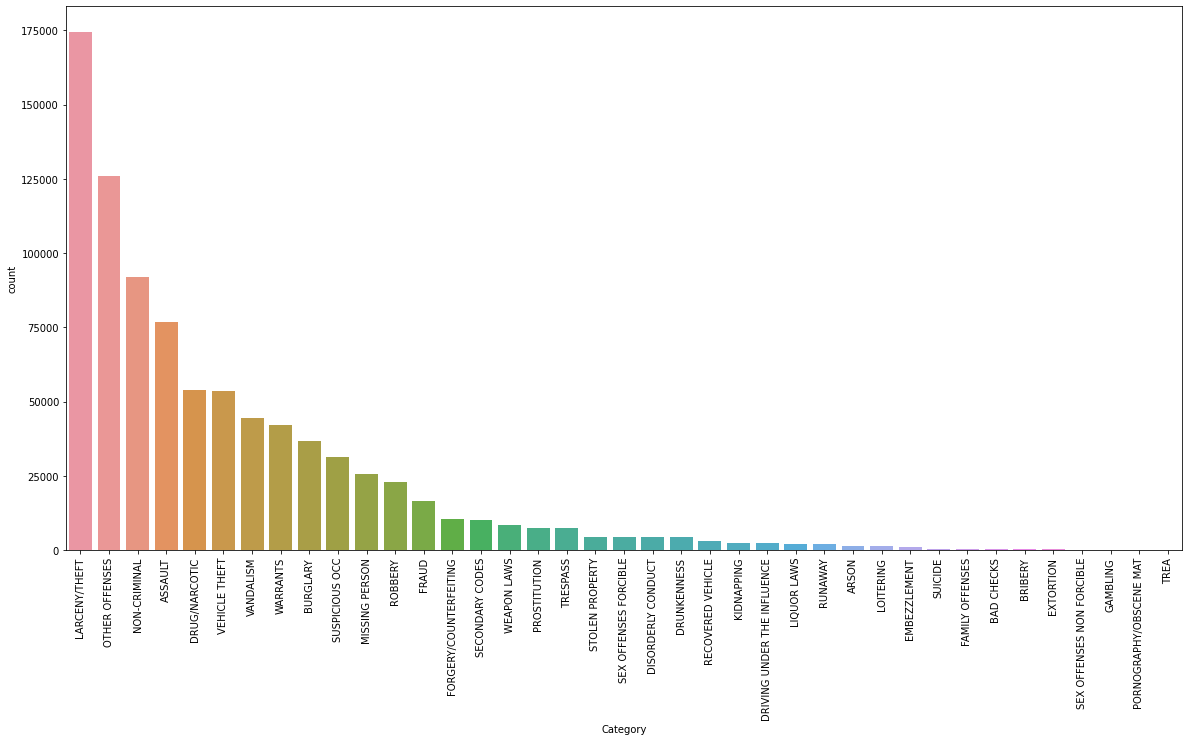

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 (countplot)
plt.figure(figsize = (20,10))
sns.countplot(data = train, x  = 'Category', order =train.Category.value_counts().index)
plt.xticks(rotation = 90)

In [ ]:
train['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO                            59765
LOST PROPERTY                                           31498
BATTERY                                                 27417
STOLEN AUTOMOBILE                                       26866
DRIVERS LICENSE, SUSPENDED OR REVOKED                   26823
                                                        ...  
FALSE REPORT OF POLICE MISCONDUCT                           1
HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS                   1
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO        1
ROBBERY, VEHICLE FOR HIRE, ATT., W/ GUN                     1
EMBEZZLEMENT, GRAND THEFT PUBLIC/PRIVATE OFFICIAL           1
Name: Descript, Length: 879, dtype: int64

In [ ]:
len(train['Descript'].value_counts().index)

879

: 범죄 설명은 총 879개인데 중요하지는 않은 듯하다 

In [ ]:
train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

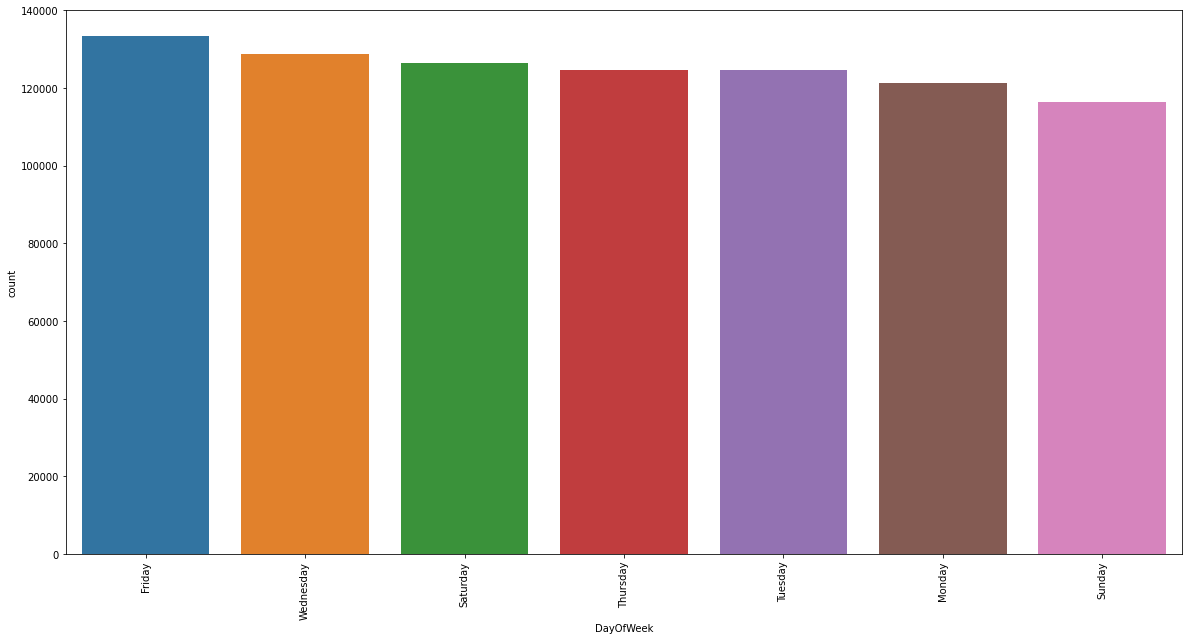

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data = train, x  = 'DayOfWeek', order =train.DayOfWeek.value_counts().index)
plt.xticks(rotation = 90)

In [ ]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [ ]:
len(train['PdDistrict'].value_counts().index)

10

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

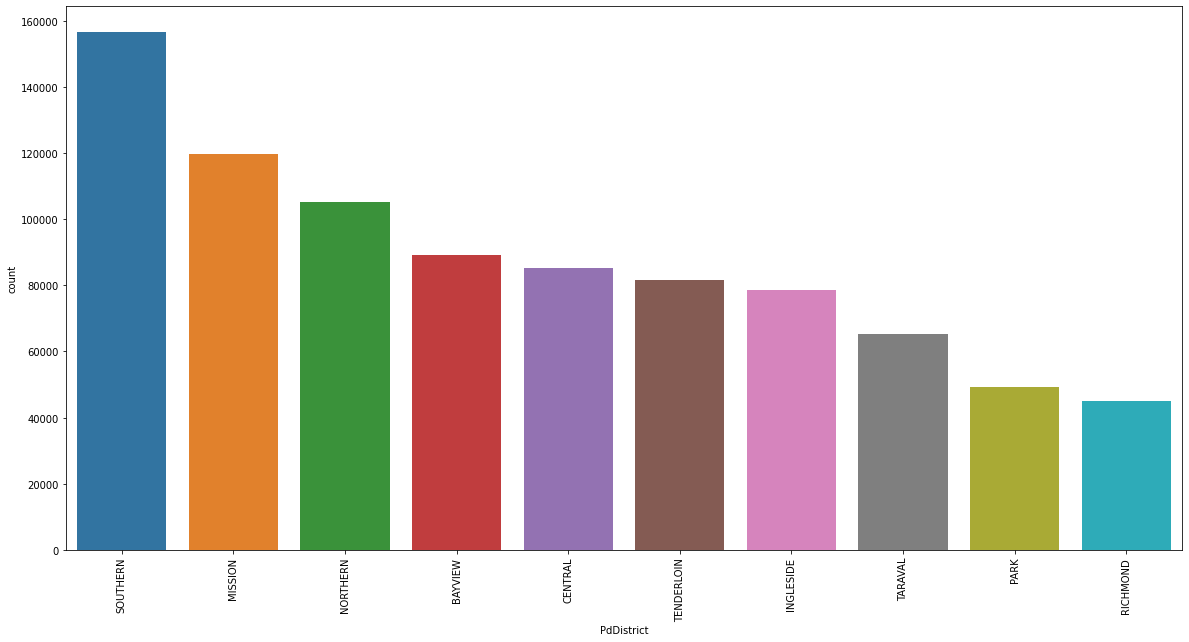

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(data = train, x  = 'PdDistrict', order =train.PdDistrict.value_counts().index)
plt.xticks(rotation = 90)

: southern - mission - northern 지방 순으로 범죄 사건 수가 많다.



```
# 코드로 형식 지정됨
```

### Dates Split

Dates 필드의 데이터 타입을 datetime64로 변경

In [ ]:
train['Dates'] = train['Dates'].astype('datetime64')

In [ ]:
print(train['Dates'].dtypes)

연, 월, 일, 요일, 시, 분값을 새로운 컬럼(year, month, day, dayofweek, hour, minute)을 생성해서 할당하기

In [ ]:
train['year'] = train['Dates'].dt.year
train['month'] = train['Dates'].dt.month
train['day'] = train['Dates'].dt.day
train['dayofweek'] = train['Dates'].dt.dayofweek
train['hour'] = train['Dates'].dt.hour
train['minute'] = train['Dates'].dt.minute

In [ ]:
train[['Dates', 'year','month', 'day', 'dayofweek', 'hour']].head()

In [ ]:
train['dayofweek'].value_counts()
# 0 ~ 6 : 7개가 요일 인듯함 

### 범죄 발생 경도 X, 위도 Y

In [75]:
# 경도 
train.X.min() , train.X.max() # 튜플 형태

(-122.51364206429, -122.36493749408)

In [76]:
# 위도 
train.Y.min(), train.Y.max()

(37.7078790224135, 37.81997549229701)

경도와 위도의 분포를 파악해보자 boxplot()



Text(0.5, 1.0, 'Latitude')

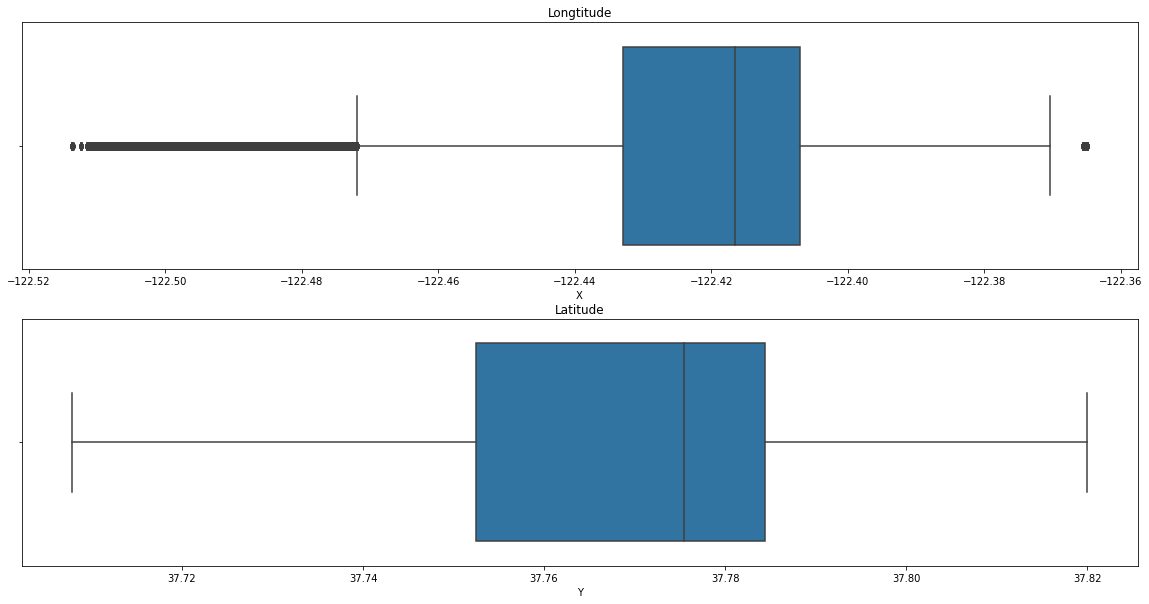

In [77]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


sns.boxplot(data = train , x= "X", ax = ax1)
sns.boxplot(data = train , x= "Y", ax = ax2)

ax1.set_title('Longtitude') #경도
ax2.set_title('Latitude') # 위도

:**이상치(outlier) 때문에 그래프기 이상하게 표현된다.**   
이상치 제거는 IQR , Q1 ~ Q3 등 정규분포를 참고하자 

In [78]:
# 이상치 제거 
train = train[train.X < -122 ]
train = train[train.Y < 50]

범죄가 발생한 경도, 위도 값을 나타내는 X, Y 컬럼의 값을 더한 값을 담은 'X+Y' 컬럼,  
 X, Y의 차이 값을 담은 'X-Y' 컬럼을 생성하기

In [79]:
train['X+Y'] = train['X'] + train['Y']
train['X-Y'] = train['X'] - train['Y']
train[['X','Y','X+Y','X-Y']].head()

,X,Y,X+Y,X-Y
0,-122.425892,37.774599,-84.651293,-160.200490
1,-122.425892,37.774599,-84.651293,-160.200490
2,-122.424363,37.800414,-84.623949,-160.224777
3,-122.426995,37.800873,-84.626123,-160.227868
4,-122.438738,37.771541,-84.667196,-160.210279


n_days라는 컬럼을 생성하고, 일별 d-day를 계산하여 입력하기  
n_days = Dates 열 , 범죄 발생일 에서 최소값을 뺀 값 


In [80]:
train['n_days'] = (train['Dates'].dt.date - train['Dates'].dt.date.min()).apply(lambda x : x.days)

train[['Dates', 'n_days']]

,Dates,n_days
0,2015-05-13 23:53:00,4510
1,2015-05-13 23:53:00,4510
2,2015-05-13 23:33:00,4510
3,2015-05-13 23:30:00,4510
4,2015-05-13 23:30:00,4510
...,...,...
878044,2003-01-06 00:15:00,0
878045,2003-01-06 00:01:00,0
878046,2003-01-06 00:01:00,0
878047,2003-01-06 00:01:00,0


* 변수 y를 선언해서 학습할 목표변수(종속변수)인 Category 필드 값 담기

In [81]:
y = train['Category']

  * 연도별(year) 별 범죄 발생 횟수를 확인해보자 

In [82]:
train['year'].value_counts().sort_index()

# value_counts() +  'sort_index()' : 발생 횟수 많은 순이 아닌 연도순으로 인덱스를 정렬 

2003    73730
2004    73186
2005    70558
2006    69713
2007    67841
2008    69976
2009    68771
2010    66354
2011    66475
2012    71558
2013    75412
2014    74563
2015    27522
Name: year, dtype: int64

In [83]:
grouped = train.groupby(['year'])
grouped.size() 
# 그룹 객체의 크기를 보고 싶다면 grouped.size()

year
2003    73730
2004    73186
2005    70558
2006    69713
2007    67841
2008    69976
2009    68771
2010    66354
2011    66475
2012    71558
2013    75412
2014    74563
2015    27522
dtype: int64

* 월별(month) 범죄 발생횟수를 알아보자 

In [84]:
train['month'].value_counts().sort_index()

# train.groupby['month'].size()

1     73333
2     70664
3     76127
4     77886
5     79463
6     70656
7     69783
8     68328
9     71801
10    80022
11    72744
12    64852
Name: month, dtype: int64

* 필요 없는 열들은 삭제하고 분석에 필요한 열만 남기자   
drop([열리스트], axis =1 ) 혹은   
df =  df.loc[: , [분석할 열 리스트들 ] ]

In [86]:
train.drop(['Dates', 'Descript', 'Resolution', 'DayOfWeek'], axis = 1, inplace = True)

In [87]:
train.head()

,Category,PdDistrict,Address,X,Y,year,month,day,dayofweek,hour,minute,X+Y,X-Y,n_days
0,WARRANTS,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
1,OTHER OFFENSES,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23,53,-84.651293,-160.200490,4510
2,OTHER OFFENSES,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23,33,-84.623949,-160.224777,4510
3,LARCENY/THEFT,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23,30,-84.626123,-160.227868,4510
4,LARCENY/THEFT,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23,30,-84.667196,-160.210279,4510
